In [4]:
import urllib
import json
import urllib.request as urllib2
import pandas as pd
import csv
import sys
import math
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import colorama
from colorama import Fore

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# CESMD USER QUERY NOTEBOOK (Station)
### - **Default format is CSV (editable**)

# Part2: Station
### Possible input:
- **Station Name**:

- Network: (default is any)

| Network Code | Network Detail ||Network Code | Network Detail |
| :- | -: || -: | -: | 
|08 | Hokkaido University|	|AA | Anchorage Strong Motion Network|
|AK | University of Alaska Geophysical Institute|	|AZ | Anza|
|BG | Berkeley Geysers Network|	|BK | Berkeley Digital Seismic Network|
|C1 | Red Sismologica Nacional|	|CB | Institute of Geophysics China Earthquake Administration (IGP)|
|CE | California Strong Motion Instrumentation Program|	|CF | Red Acelerografica Nacional de la Comision Federal de Electr|	|CI | California Institute of Technology|
|CU | Albuquerque Seismological Laboratory|	|C_ | C&GS|
|EC | Ecuador Seismic Network|	|ES | Spanish Digital Seismic Network|
|GI | Red Sismologica Nacional Guatemala|	|G_ | GEOSCOPE|
|HV | Hawaiian Volcano Observatory Network|	|IT | Italian Strong Motion Network|
|IU | GSN  IRIS/USGS|	|IV | Istituto Nazionale di Geofisica e Vulcanologia|
|JP | BRI|	|JP | ERI|
|JP | KIKNET|	|JP | KNET|
|JP | PARI|	|LA | Los Angeles Basin Seismic Network|
|MN | Mediterranean Very Broadband Seismographic Network|	|NC | USGS Northern California Regional Network|
|ND | New Caledonia Broadband Seismic Network (SismoCal)|	|NM | New Madrid Seismic Network|
|NN | Nevada Seismic Network|	|NP | National Strong Motion Project|
|NZ|	|	|OK | Oklahoma Geological Survey|
|OV | Observatorio Vulcanologico y Sismologico de Costa Rica|	|PA | Observatorio Sismico del Occidente de Panamá|
|PG|	|	|PR | Puerto Rico Strong Motion Program (PRSMP)|
|TO | Caltech Tectonic Observatory|	|TU | Turkey Strong Motion Network|
|TU | National Seismic Network of Turkey|	|US | National Earthquake Information Center|
|UW | PNSN|	|WR | California Department of Water Resources|
|_C | NMI|	|_C|	|
|_C | University of Chile Santiago|	|_C | Chilean National Seismic Network|


- Station Type:
| Station Code | Station Detail |
| :- | -: |
|A|"Array"|  
|G|"Ground"|  
|B|"Building"|  
|Br|"Bridge"|  
|D|"Dam"|  
|T|"Tunnel"|  
|W|"Wharf"|  
|O|"Other"|


- VS30: 
    - &Vs30Method=true
    - vs30min=10&vs30max=30&Vs30Method=true
- Location:
    - Coordinates:
                min and max Latitude and Longtitude 
    - Circle: 
                center point (lat, long) and radius in unit (km)

In [5]:
net = ['08','ak','c1','ce','cu','ec', 'gi','hv','iu','jp','mn','nd','nn','nz','ov','pg','to','uw','_c','aa','az','bk','cb','cf','c_','es','g_','it','iv','la','nc','nm','np','ok','pa','pr','tu','us','wr']
sta = ['a','g','b','br','d','t','w','o']
net_code = sorted([each_string.upper() for each_string in net])
sta_code = sorted([each_string.upper() for each_string in sta])

net = ['08','ak','c1','ce','cu','ec', 'gi','hv','iu','jp','mn','nd','nn','nz','ov','pg','to','uw','_c','aa','az','bk','cb','cf','c_','es','g_','it','iv','la','nc','nm','np','ok','pa','pr','tu','us','wr']
sta = ['a','g','b','br','d','t','w','o']
net_code = sorted([each_string.upper() for each_string in net])
sta_code = sorted([each_string.upper() for each_string in sta])

In [6]:
# By Circle
def earthquake_country_circle(url):
    latitue = input('Latitude at circle center')  
    longitude = input('Longitude at circle center')
    radius = input ('Radius(km) from circle center')
    if  latitue and longitude and radius: 
        url = url+f'&lat={latitue}&lon={longitude}&rad={radius}'
        print(url)
    else:
        print(Fore.RED + 'You may missing at least one parameter, the url will not contain the circle query')
        print(url)
    return url




# By Coordinates
def earthquake_Coordinates(url):
    minlat=input('Min Latitude') 
    maxlat=input('Max Latitude') 
    minlon=input('Min Longitude')
    maxlon=input('Max Longitude')
    
    if  minlat and maxlat and minlon and maxlon: 
        url = url +f'&minlat={minlat}&maxlat={maxlat}&minlon={minlon}&maxlon={maxlon}'
        print(url)
    else:
        print(Fore.RED + 'You may missing at least one parameter, the url will not contain the coordinates query')
        print(url)
    return url

In [16]:
# earthquake_country_circle(url):
# earthquake_Coordinates(url):
# Start with create the query url

def station_parameter(url):
    v30 = input('Do you want to enter VS30? (yes or no)')
    if v30 == 'yes':
        url = url+'&Vs30Method=true'
        min_v30 = input('Do you want to enter min VS30?')
        max_v30 = input('Do you want to enter max VS30?')
        if min_v30:
            url = url+'&vs30min='+min_v30
        if max_v30:
            url = url+'&vs30min='+max_v30 
        
    print("For station code, you can enter multiple code, sperate then by ','")
    print('Netcode:\n',net_code )
    network = input('Please enter the network code: ')
    a = [item.upper() for item in network.split(',')]
    check =  set(a).issubset(net_code)
 
    if check is True:
        url = url + f'&netid={network.upper()}'   
    else :
        for i in network.split(','):
            if i.upper() not in net_code:
                print(i,'is not in Database. The network code input will be ignored')
    print(check,url)

    print('Station Code\n', sta_code)
    station = input('Please enter a station code: ')
    if station.upper() in sta_code:
            url = url + f'&sttype={station.upper()}'
    else:
        print(station,'is not in Database. The staion code input will be ignored')

    station_name = input('Please enter a station name: ')
    if station_name:
        url = url + f'&stname={station_name}'
    print(url)
    return url



def station_query(url):
    print("For the following question, please enter follow the instructions or skip by push the 'return' button. Thanks!\n")
    station_name = input ('Do yo have station code/id? (Please enter yes or no)')
    if  station_name.lower() == 'yes':
        sta_id = input('Station code/id:')
        url = url +f'&stcode={sta_id}'
        print(url)
    else:
        query = input('Do you want to query by parameters, location, or both?   (parameters/location/both)')
        if query.lower() == 'parameters':
            url = station_parameter(url)
        elif query.lower() == 'location':
            loc_type= input('Do you want to query by circle or coordination?')
            if loc_type.lower() == 'circle':
                url =  earthquake_country_circle(url) # Call from Part 1. 
            elif loc_type.lower() == 'coordination':
                url = earthquake_Coordinates(url) # Call from Part 1. 
            else:
                print(Fore.RED +'Unknow input', url)
        elif query.lower() == 'both':
            url = station_parameter(url)
            loc_type= input('Do you want to query by circle or coordination?')
            if loc_type.lower() == 'country':
                url = earthquake_country(url) # Call from Part 1. 
            elif loc_type.lower() == 'circle':
                url =  earthquake_country_circle(url) # Call from Part 1. 
            elif loc_type.lower() == 'coordination':
                url = earthquake_Coordinates(url)
            else:
                print(Fore.RED +'Unknow input, try again',url)
        else:
            print('Unknow input, try again')
            
    if url == 'https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404':
        print('You must enter at least one parameter! Try Again.')
            
    return url


def sta_open_url(url):
    data = pd.DataFrame()
    try:
        data = pd.read_csv(url)

    except:
        print('URL show Eroor, please check inputs')
    return data

In [20]:
def plot_map(data,lat_0=38.1,lon_0=-118,zoom_start = 3,lon='Longitude',lat='Latitude'):
    """
    data: the dataframe
    lat_0,lon_0, the center of the map
    zoom_start
    lon & lat: the columns name for longtitude and latitude
    """
    # Create a map
    m_1 = folium.Map(location=[lat_0,lon_0], tiles='openstreetmap', zoom_start=3)
    # Add points to the map
    mc = MarkerCluster()
    for idx, row in data.iterrows():
        if not math.isnan(row[lon]) and not math.isnan(row[lat]):
            mc.add_child(Marker([row[lat], row[lon]]))
    m_1.add_child(mc)

    # Display the map
    return m_1

In [19]:
url = 'https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404'
sta = station_query(url)
sta_data = sta_open_url(sta)
sta_data.head()

For the following question, please enter follow the instructions or skip by push the 'return' button. Thanks!



Do yo have station code/id? (Please enter yes or no) yes


yes


Station code/id: np5082


https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404&stcode=np5082


,Code,Network,Status,Channels,Recorder_type,NumRecorders,Comm_code,Crl_orientation,Name,Location,...,Vs30_info,Vs30_method,Vs30_reference,Bldtype,Bldheight,Station_page,Geo_type,Coord_long,Coord_lat,Id
0,5082,NP,Active,24,C,NaN,NaN,?,CA Los Angeles; Wadsworth VAMC B. 500,NaN,...,NaN,NaN,NaN,NaN,NaN,https://strongmotioncenter.org/cgi-bin/CESMD/s...,Point,-118.45253,34.05271,NP5082


In [21]:
# station map
m_2 = plot_map(sta_data,lat_0=38.1,lon_0=-118,zoom_start = 3,lon='Coord_long',lat='Coord_lat')
m_2

In [22]:
sta_data.columns

Index(['Code', 'Network', 'Status', 'Channels', 'Recorder_type',
       'NumRecorders', 'Comm_code', 'Crl_orientation', 'Name', 'Location',
       'Effdate', 'Elevation', 'Type_P', 'Vs30', 'Geology', 'Siteclass',
       'Vs30_info', 'Vs30_method', 'Vs30_reference', 'Bldtype', 'Bldheight',
       'Station_page', 'Geo_type', 'Coord_long', 'Coord_lat', 'Id'],
      dtype='object')

In [26]:
# CESMD Station page
for i in sta_data.index:
    print(sta_data['Network'][i],sta_data['Code'][i],sta_data['Station_page'][i])

NP 5082 https://strongmotioncenter.org/cgi-bin/CESMD/stationhtml.pl?stationID=NP5082&network=NSMP


# Station Waveform

In [1]:
import obspy as ob
import numpy as np
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from obspy import UTCDateTime

%matplotlib inline


#### https://ds.iris.edu/ds/nodes/dmc/tools/event/11230644
- Obspy clients are here https://docs.obspy.org/master/packages/obspy.clients.fdsn.html

In [2]:
client = Client("NCEDC")

In [3]:
EVIDstr=input("Please enter eventid (without netcode:")
EVID = int(EVIDstr)
#73626591

Please enter eventid (without netcode: 73626591


In [4]:
events = client.get_events(eventid=EVID)
events

1 Event(s) in Catalog:
2021-09-19T00:09:14.810000Z | +37.728, -121.991 | 3.1 Mw | manual

In [5]:
Netcode ="NC"
Station = "CYD"

In [6]:
elat = events[0].origins[0].latitude
elon = events[0].origins[0].longitude
estart = events[0].origins[0].time

In [7]:
client = Client("NCEDC")

In [8]:
bulk_request = [(Netcode, Station, "*", "H**", estart, estart+ 180)]
stations = client.get_stations_bulk(bulk_request, level='channel')
waveforms = client.get_waveforms_bulk(bulk_request)

In [9]:
bulk_request = [(Netcode, Station, "*", "H**", estart, estart+ 180)]
stations = client.get_stations_bulk(bulk_request, level='channel')
waveforms = client.get_waveforms_bulk(bulk_request)

In [10]:
inv = client.get_stations_bulk(bulk_request)
print(inv)

Inventory created at 2022-06-13T14:27:03.000000Z
	Created by: NCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.ncedc.org/fdsnws/station/1/query?net=NC&sta=CYD&cha=...
	Sending institution: NCEDC (NCEDC)
	Contains:
		Networks (1):
			NC
		Stations (1):
			NC.CYD (Coyote Hills #2)
		Channels (0):



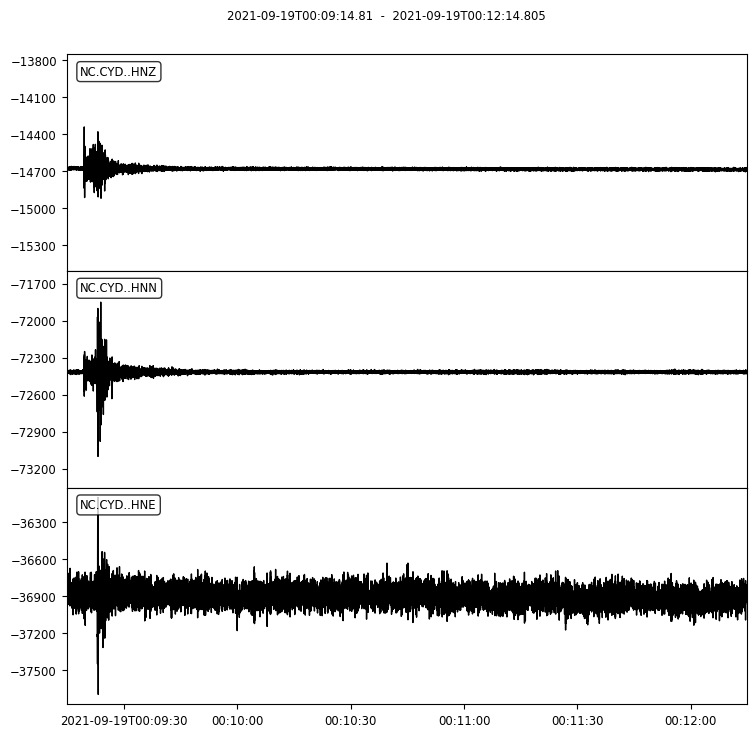

In [11]:
waveforms.plot()
waveforms.plot(outfile=Netcode+'.'+Station+'_nc'+EVIDstr+'.jpg')
waveforms.write(Netcode+'.'+Station+'_nc'+EVIDstr+'.mseed', format='mseed') 
